# Classification

## Team Name
>### Sigma  

## Team Member
>### 조현윤, 이상협, 정하연  

## Objective
> ### in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them.
> ### to create a classification algorithm that accurately identifies which customers have the most potential business value for Red Hat based on their characteristics and activities.
> ### to predict the potential business value of a person who has performed a specific activity.

## Evaluation
> ### valuated on area under the ROC curve between the predicted and the observed outcome.

## Submission File
> ### For each activity_id in the test set, you must predict a probability for the 'outcome' variable, represented by a number between 0 and 1.
~~~~
activity_id,outcome
act1_1,0
act1_100006,0
act1_100050,0
~~~~

## Reference 
[kaggel Predicting Red Hat Business Value](https://www.kaggle.com/c/predicting-red-hat-business-value)

## Load Data Set

In [1]:
# activity data set
act_Train = pd.read_csv('./data/act_train.csv')
act_Test = pd.read_csv('./data/act_test.csv')
# people data set
people = pd.read_csv('./data/people.csv')

## Data
> #### uses two separate data files that may be joined together to create a single, unified data table.
> #### a people file and an activity file.

### People file
> #### all of the unique people (and the corresponding characteristics) that have performed activities over time.
> #### Each row in the people file represents a unique person.
> #### Each person has a unique people_id.

In [2]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189118 entries, 0 to 189117
Data columns (total 41 columns):
people_id    189118 non-null object
char_1       189118 non-null object
group_1      189118 non-null object
char_2       189118 non-null object
date         189118 non-null object
char_3       189118 non-null object
char_4       189118 non-null object
char_5       189118 non-null object
char_6       189118 non-null object
char_7       189118 non-null object
char_8       189118 non-null object
char_9       189118 non-null object
char_10      189118 non-null bool
char_11      189118 non-null bool
char_12      189118 non-null bool
char_13      189118 non-null bool
char_14      189118 non-null bool
char_15      189118 non-null bool
char_16      189118 non-null bool
char_17      189118 non-null bool
char_18      189118 non-null bool
char_19      189118 non-null bool
char_20      189118 non-null bool
char_21      189118 non-null bool
char_22      189118 non-null bool
char_23      18

In [3]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


### activity file

> #### the unique activities (and the corresponding activity characteristics) that each person has performed over time.
> #### Each row in the activity file represents a unique activity performed by a person on a certain date.
> #### Each activity has a unique activity_id.
> #### The activity file contains several different categories of activities.    
>> ##### Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).
> ####  All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.

In [4]:
act_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Data columns (total 15 columns):
people_id            object
activity_id          object
date                 object
activity_category    object
char_1               object
char_2               object
char_3               object
char_4               object
char_5               object
char_6               object
char_7               object
char_8               object
char_9               object
char_10              object
outcome              int64
dtypes: int64(1), object(14)
memory usage: 251.5+ MB


In [5]:
act_Train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [6]:
act_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498687 entries, 0 to 498686
Data columns (total 14 columns):
people_id            498687 non-null object
activity_id          498687 non-null object
date                 498687 non-null object
activity_category    498687 non-null object
char_1               40092 non-null object
char_2               40092 non-null object
char_3               40092 non-null object
char_4               40092 non-null object
char_5               40092 non-null object
char_6               40092 non-null object
char_7               40092 non-null object
char_8               40092 non-null object
char_9               40092 non-null object
char_10              458595 non-null object
dtypes: object(14)
memory usage: 53.3+ MB


In [7]:
act_Test.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


> #### To develop a predictive model with this data, you will likely need to join the files together into a single data set.
> #### The two files can be joined together using person_id as the common key.

### Load Python Package

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from datetime import date
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as stools
import scipy as sp
%matplotlib inline

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import *
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost

## Exploratory Data Analysis (EDA )¶

### Split people data set wether train data set or test data set

In [118]:
idx_train =list(act_Train['people_id'].value_counts().index)
idx_test =list(act_Test['people_id'].value_counts().index)

In [119]:
train_people = people.loc[people['people_id'].isin(idx_train)]
test_people = people.loc[people['people_id'].isin(idx_test)]

In [120]:
train_people.to_csv('./data/act_train_people.csv',index=False)
test_people.to_csv('./data/act_test_people.csv',index=False)

In [121]:
print('Number of active people: {}'.format(act_Train['people_id'].nunique()))

Number of active people: 151295


In [122]:
print('Number of active people: {}'.format(act_Test['people_id'].nunique()))

Number of active people: 37823


### group by people_id & outcome in act_train dataset

In [123]:
dfx = act_Train.groupby(['people_id','outcome']).size().unstack()
dfx = dfx.fillna(0).astype(int)

In [124]:
only1 = dfx[(dfx[0]==0) & (dfx[1]!=0)]
only0 = dfx[(dfx[0]!=0) & (dfx[1]==0)]
mix_0or1 = dfx[(dfx[0]!=0) & (dfx[1]!=0)]
totalCount = len(only1.index) + len(only0.index) + len(mix_0or1)

In [125]:
only1 = len(only1.index)/totalCount
only0 = len(only0.index)/totalCount
mix = len(mix_0or1)/totalCount

In [126]:
print ('only 1, people probability : {0:0.3f}'.format(only1))
print ('only 0, people probability : {0:0.3f}'.format(only0))
print ('0 or 1, people probability : {0:0.3f}'.format(mix))

only 1, people probability : 0.411
only 0, people probability : 0.545
0 or 1, people probability : 0.044


### training people data 

In [127]:
# import numpy as np
def ResetDataFrame(df, checkList):
    for feature in df.columns:
        if feature not in checkList:
            if df[feature].dtype == 'object':
                df[feature].fillna ('type 0', inplace = True)
                df[feature] = df[feature].apply(lambda x:x.split(' ')[1]).astype(np.int32)
            elif df[feature].dtype == 'bool':
                df[feature] = df[feature].astype(np.int8)
    return df

In [128]:
def SetTime(df, timeFeature):
    df[timeFeature] = pd.to_datetime(df[timeFeature])
    df['year'] = df[timeFeature].dt.year
    df['month'] = df[timeFeature].dt.month
    df['day'] = df[timeFeature].dt.day
    df['weekday'] = df[timeFeature].dt.weekday
    df['weekend'] = ((df.weekday == 0) | (df.weekday == 6)).astype(int)
    return df

In [129]:
train_people = pd.merge(train_people, dfx, left_on = 'people_id',right_index = True)

In [130]:
train_people.rename(columns={0:'outcome_0',1:'outcome_1'}, inplace = True)

In [131]:
def ax(x):
    if x['outcome_0'] !=0 and x['outcome_1'] ==0:
        return 0
    elif x['outcome_0'] ==0 and x['outcome_1'] !=0:
        return 1
    else:
        return 2

In [132]:
train_people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,outcome_0,outcome_1
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,True,False,False,True,True,True,False,36,6,0
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,True,True,True,True,True,True,False,76,0,2
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,True,True,True,True,False,True,True,99,0,34
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,True,False,False,False,True,True,False,84,0,3
7,ppl_100013,type 2,group 4204,type 3,2023-01-24,type 4,type 8,type 4,type 1,type 7,...,True,True,True,True,False,True,True,91,0,5


In [133]:
train_people['result'] = train_people.apply(ax, axis = 1)

In [134]:
train_people.drop(['outcome_0','outcome_1'],inplace = True, axis = 1)

In [135]:
peopleCheckList = ['people_id','date','result']

In [136]:
train_people = ResetDataFrame(train_people, peopleCheckList)
train_people = SetTime(train_people,'date')
train_people.drop('date',axis = 1,inplace = True)

In [137]:
train_people.shape

(151295, 46)

In [138]:
train_people.head()

,people_id,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_35,char_36,char_37,char_38,result,year,month,day,weekday,weekend
0,ppl_100,2,17304,2,5,5,5,3,11,2,...,1,1,0,36,0,2021,6,29,1,0
1,ppl_100002,2,8688,3,28,9,5,3,11,2,...,1,1,0,76,1,2021,1,6,2,0
2,ppl_100003,2,33592,3,4,8,5,2,5,2,...,0,1,1,99,1,2022,6,10,4,0
4,ppl_100006,2,6534,3,40,25,9,3,8,2,...,1,1,0,84,1,2022,7,27,2,0
7,ppl_100013,2,4204,3,4,8,4,1,7,2,...,0,1,1,91,1,2023,1,24,1,0


In [139]:
train_people_target = train_people['result']
train_people_data = train_people.drop(['people_id','result'],axis = 1)

In [140]:
print (train_people_target.shape)
print (train_people_data.shape)

(151295,)
(151295, 44)


In [141]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz


In [104]:
lomodel = LogisticRegression(random_state=5).fit(train_people_data, train_people_target)

In [93]:
accuracy_score(lomodel.predict(train_people_data),train_people_target)

0.81021183780032391

In [94]:
bagmodel = BaggingClassifier(LogisticRegression(), bootstrap_features=True, random_state=0).fit(train_people_data, train_people_target)


In [96]:
accuracy_score(bagmodel.predict(train_people_data),train_people_target)

0.81996761294160414

In [95]:
randommodel = RandomForestClassifier(max_depth=5, n_estimators=500).fit(train_people_data, train_people_target)

In [97]:
accuracy_score(randommodel.predict(train_people_data),train_people_target)

0.82677550480848672

In [98]:
model_ada = AdaBoostClassifier(LogisticRegression(), 
                               algorithm="SAMME", n_estimators=500).fit(train_people_data, train_people_target)

In [99]:
accuracy_score(model_ada.predict(train_people_data),train_people_target)

0.80755477709111334

In [ ]:
command_buf = io.StringIO() 
export_graphviz(model_grad, out_file=command_buf, feature_names=train_people_data.columns) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 

In [142]:
list1 = ['people_id','activity_id','date', 'outcome']
act_Train = ResetDataFrame(act_Train, list1)
act_Train = SetTime(act_Train,'date')
act_Train.drop('date',axis = 1,inplace = True)

In [143]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [144]:
list1 = ['people_id','date','char_38']
people = ResetDataFrame(people, list1)
people = SetTime(people,'date')
people.drop('date',axis = 1,inplace = True)

In [145]:
trainMerge = pd.merge(act_Train,people, on='people_id')
trainMerge.tail()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
2197286,ppl_99994,act2_4668076,4,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0
2197287,ppl_99994,act2_4743548,4,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0
2197288,ppl_99994,act2_536973,2,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0
2197289,ppl_99994,act2_688656,4,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0
2197290,ppl_99994,act2_715089,2,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0


In [146]:
trainMerge.to_csv('./data/train_merge.csv',index=False)

In [147]:
list1 = ['people_id','activity_id','date', 'outcome']
act_Test = ResetDataFrame(act_Test, list1)
act_Test = SetTime(act_Test,'date')
act_Test.drop('date',axis = 1,inplace = True)

In [148]:
testMerge = pd.merge(act_Test,people, on='people_id')
testMerge.tail()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
498682,ppl_99997,act2_4367092,2,0,0,0,0,0,0,0,...,0,0,0,0,36,2022,3,12,5,0
498683,ppl_99997,act2_4404220,2,0,0,0,0,0,0,0,...,0,0,0,0,36,2022,3,12,5,0
498684,ppl_99997,act2_448830,2,0,0,0,0,0,0,0,...,0,0,0,0,36,2022,3,12,5,0
498685,ppl_99997,act2_450133,2,0,0,0,0,0,0,0,...,0,0,0,0,36,2022,3,12,5,0
498686,ppl_99997,act2_847967,2,0,0,0,0,0,0,0,...,0,0,0,0,36,2022,3,12,5,0


In [149]:
testMerge.to_csv('./data/test_merge.csv',index=False)

In [150]:
act_id = testMerge['activity_id']
testMergeX = testMerge.drop(['people_id','activity_id'],axis = 1)

In [151]:
trainMerge.tail()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
2197286,ppl_99994,act2_4668076,4,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0
2197287,ppl_99994,act2_4743548,4,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0
2197288,ppl_99994,act2_536973,2,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0
2197289,ppl_99994,act2_688656,4,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0
2197290,ppl_99994,act2_715089,2,0,0,0,0,0,0,0,...,1,1,1,1,95,2023,1,6,4,0


In [155]:
mergeX = trainMerge.drop(['people_id','activity_id','outcome'],axis = 1)
mergey = trainMerge['outcome']

In [156]:
x_Trainm, x_Testm, y_trainm, y_testm = train_test_split(mergeX, 
                                                   mergey, test_size = 0.2, random_state = 1)

In [ ]:
y_trainm0 = np_utils.to_categorical(y_trainm,2)
y_testm0 = np_utils.to_categorical(y_testm, 2)

In [ ]:
print (x_Trainm.shape)
print (x_Testm.shape)

In [ ]:
from keras.layers import Dropout

In [ ]:
np.random.seed(0)

modelm = Sequential()
modelm.add(Dense(500, input_dim=60, activation="sigmoid",kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(0.02)))
modelm.add(Dropout(0.4))
modelm.add(Dense(100, activation="relu"))
modelm.add(Dropout(0.4))
modelm.add(Dense(2, activation="softmax"))
#model.add(Dense(2, activation="relu"))
#model.add(Dropout(0.2))
#model.add(Dense(2, activation="softmax"))
#model.compile(optimizer=SGD(lr=3), loss='mean_squared_error', metrics=["accuracy"])
modelm.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=["accuracy"])


SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
histm = modelm.fit(x_Trainm.values, y_trainm0, 
                 epochs=500, batch_size=500000, 
                 validation_data=(x_Testm.values, y_testm0), 
                 verbose=2)

In [ ]:
plt.plot(histm.history['loss'])
plt.show()

In [ ]:
plt.plot(histm.history['acc'], 'b-', label="training")
plt.plot(histm.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [ ]:
x = modelm.predict_classes(testMergeX.values)

In [ ]:
x2 = pd.concat([act_id,pd.DataFrame(x)],axis = 1)
x2.rename({0:'outcome'},inplace = True,axis = 1)

In [ ]:
x2.to_csv('./submission8.csv',index = False)

In [157]:
import time
import xgboost as xgb
from sklearn.cross_validation import train_test_split

In [184]:
def run(train, test, random_state=0):
    #eta = 1.3
    #max_depth = 3
    #subsample = 0.8
    #colsample_bytree = 0.8
    #start_time = time.time()
    params = {'max_depth':10, 'eta':0.05, 'silent':1, 'objective':'binary:logistic' }
    params['nthread'] = 4
    params['eval_metric'] = 'auc'
    params['subsample'] = 0.7
    params['colsample_bytree']= 0.7
    params['min_child_weight'] = 0
    params['booster'] = "gblinear"
    """params ={
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "max_depth" : max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent":1,
        "seed": random_state
    }"""
    num_boost_round = 600
    early_stopping_rounds = 10
    test_size = 0.1
    categorical=['group_1','activity_category','char_1_x','char_2_x',
                 'char_3_x','char_4_x','char_5_x','char_6_x','char_7_x',
                 'char_8_x','char_9_x','char_2_y','char_3_y','char_4_y',
                 'char_5_y','char_6_y','char_7_y','char_8_y','char_9_y']
    not_categorical=[]
    for category in train.columns:
        if category not in categorical:
            not_categorical.append(category)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc=enc.fit(pd.concat([train[categorical],test[categorical]]))
    train0=enc.transform(train[categorical])
    test0=enc.transform(test[categorical])
    from scipy.sparse import hstack
    train=pd.concat([train[not_categorical], train0],axis = 1)
    test=pd.concat([test[not_categorical], test0],axis = 1)
    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train['outcome']
    y_valid = X_valid['outcome']
    X_train = X_train.drop(['people_id','activity_id','outcome'],axis = 1)
    X_valid = X_valid.drop(['people_id','activity_id','outcome'], axis = 1)
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

    check = gbm.predict(xgb.DMatrix(X_valid))
    score = roc_auc_score(y_valid, check)
    print (score)
    testActivityId = test['activity_id']
    test = test.drop(['people_id','activity_id'],axis = 1)
    test_prediction = gbm.predict(xgb.DMatrix(test))
    out = pd.concat([testActivityId,pd.DataFrame(test_prediction.round())],axis = 1)
    out.rename({0:'outcome'},axis = 1,inplace = True)
    return out,test_prediction

In [185]:
trainMerge0 = trainMerge#.drop(['char_10_x','weekday_x','weekday_y'],axis = 1)
testMerge0 = testMerge#.drop(['char_10_x','weekday_x','weekday_y'],axis = 1)

In [186]:
x = run(trainMerge0, testMerge0)

TypeError: cannot concatenate object of type "<class 'scipy.sparse.csr.csr_matrix'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [ ]:
x[0].to_csv('./a.csv',index = False)

In [109]:
import numpy as np 
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

def reduce_dimen(dataset,column,toreplace):
    for index,i in dataset[column].duplicated(keep=False).iteritems():
        if i==False:
            dataset.set_value(index,column,toreplace)
    return dataset
    
def act_data_treatment(dsname):
    dataset = dsname
    
    for col in list(dataset.columns):
        if col not in ['people_id', 'activity_id', 'date', 'char_38', 'outcome']:
            if dataset[col].dtype == 'object':
                dataset[col].fillna('type 0', inplace=True)
                dataset[col] = dataset[col].apply(lambda x: x.split(' ')[1]).astype(np.int32)
            elif dataset[col].dtype == 'bool':
                dataset[col] = dataset[col].astype(np.int8)
    
    dataset['year'] = dataset['date'].dt.year
    dataset['month'] = dataset['date'].dt.month
    dataset['day'] = dataset['date'].dt.day
    dataset['isweekend'] = (dataset['date'].dt.weekday >= 5).astype(int)
    dataset = dataset.drop('date', axis = 1)
    
    return dataset

act_train_data = pd.read_csv("./data/act_train.csv",dtype={'people_id': np.str, 'activity_id': np.str, 'outcome': np.int8}, parse_dates=['date'])
act_test_data  = pd.read_csv("./data/act_test.csv", dtype={'people_id': np.str, 'activity_id': np.str}, parse_dates=['date'])
people_data    = pd.read_csv("./data/people.csv", dtype={'people_id': np.str, 'activity_id': np.str, 'char_38': np.int32}, parse_dates=['date'])

act_train_data=act_train_data.drop('char_10',axis=1)
act_test_data=act_test_data.drop('char_10',axis=1)

print("Train data shape: " + format(act_train_data.shape))
print("Test data shape: " + format(act_test_data.shape))
print("People data shape: " + format(people_data.shape))

act_train_data  = act_data_treatment(act_train_data)
act_test_data   = act_data_treatment(act_test_data)
people_data = act_data_treatment(people_data)

train = act_train_data.merge(people_data, on='people_id', how='left', left_index=True)
test  = act_test_data.merge(people_data, on='people_id', how='left', left_index=True)

del act_train_data
del act_test_data
del people_data

train=train.sort_values(['people_id'], ascending=[1])
test=test.sort_values(['people_id'], ascending=[1])

train_columns = train.columns.values
test_columns = test.columns.values
features = list(set(train_columns) & set(test_columns))

train.fillna('NA', inplace=True)
test.fillna('NA', inplace=True)

y = train.outcome
train=train.drop('outcome',axis=1)

whole=pd.concat([train,test],ignore_index=True)
categorical=['group_1','activity_category','char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x','char_7_x','char_8_x','char_9_x','char_2_y','char_3_y','char_4_y','char_5_y','char_6_y','char_7_y','char_8_y','char_9_y']
for category in categorical:
    whole=reduce_dimen(whole,category,9999999)
    
X=whole[:len(train)]
X_test=whole[len(train):]

del train
del whole
    
X=X.sort_values(['people_id'], ascending=[1])

X = X[features].drop(['people_id', 'activity_id'], axis = 1)
X_test = X_test[features].drop(['people_id', 'activity_id'], axis = 1)

categorical=['group_1','activity_category','char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x','char_7_x','char_8_x','char_9_x','char_2_y','char_3_y','char_4_y','char_5_y','char_6_y','char_7_y','char_8_y','char_9_y']
not_categorical=[]
for category in X.columns:
    if category not in categorical:
        not_categorical.append(category)

enc = OneHotEncoder(handle_unknown='ignore')
enc=enc.fit(pd.concat([X[categorical],X_test[categorical]]))
X_cat_sparse=enc.transform(X[categorical])
X_test_cat_sparse=enc.transform(X_test[categorical])

from scipy.sparse import hstack
X_sparse=hstack((X[not_categorical], X_cat_sparse))
X_test_sparse=hstack((X_test[not_categorical], X_test_cat_sparse))

print("Training data: " + format(X_sparse.shape))
print("Test data: " + format(X_test_sparse.shape))
print("###########")
print("One Hot enconded Test Dataset Script")

dtrain = xgb.DMatrix(X_sparse,label=y)
dtest = xgb.DMatrix(X_test_sparse)

param = {'max_depth':10, 'eta':0.02, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['subsample'] = 0.7
param['colsample_bytree']= 0.7
param['min_child_weight'] = 0
param['booster'] = "gblinear"

watchlist  = [(dtrain,'train')]
num_round = 300
early_stopping_rounds=10
bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=early_stopping_rounds)

ypred = bst.predict(dtest)
output = pd.DataFrame({ 'activity_id' : test['activity_id'], 'outcome': ypred })
output.head()
output.to_csv('without_leak.csv', index = False)

Train data shape: (2197291, 14)
Test data shape: (498687, 13)
People data shape: (189118, 41)


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


Training data: (2197291, 31271)
Test data: (498687, 31271)
###########
One Hot enconded Test Dataset Script
[0]	train-auc:0.888845
Will train until train-auc hasn't improved in 10 rounds.
[1]	train-auc:0.896459
[2]	train-auc:0.904359
[3]	train-auc:0.912579
[4]	train-auc:0.920675
[5]	train-auc:0.928466
[6]	train-auc:0.935699
[7]	train-auc:0.942393
[8]	train-auc:0.948615
[9]	train-auc:0.954402
[10]	train-auc:0.959719
[11]	train-auc:0.964531
[12]	train-auc:0.968799
[13]	train-auc:0.972519
[14]	train-auc:0.975718
[15]	train-auc:0.978437
[16]	train-auc:0.98073
[17]	train-auc:0.982657
[18]	train-auc:0.984268
[19]	train-auc:0.985617
[20]	train-auc:0.986747
[21]	train-auc:0.9877
[22]	train-auc:0.988509
[23]	train-auc:0.989205
[24]	train-auc:0.989809
[25]	train-auc:0.990341
[26]	train-auc:0.990813
[27]	train-auc:0.991236
[28]	train-auc:0.991617
[29]	train-auc:0.991963
[30]	train-auc:0.992278
[31]	train-auc:0.992566
[32]	train-auc:0.992831
[33]	train-auc:0.993075
[34]	train-auc:0.9933
[35]	train

In [111]:
import pandas as pd
import numpy as np

def simple_load():

    # Read in the data
    people = pd.read_csv("./data/people.csv")
    train = pd.read_csv("./data/act_train.csv")
    test = pd.read_csv("./data/act_test.csv")

    # Merge people to the other data sets
    train = train.merge(people, on="people_id", suffixes=("_act", ""))
    test = test.merge(people, on="people_id", suffixes=("_act", ""))

    # Set index to activity id
    train = train.set_index("activity_id")
    test = test.set_index("activity_id")

    # Correct some data types
    for field in ["date_act", "date"]:
        train[field] = pd.to_datetime(train[field])
        test[field] = pd.to_datetime(test[field])

    return train, test


def group_decision(train, test, only_certain=True):
    # Exploit the leak revealed by Loiso and team to try and directly infer any labels that can be inferred
    # https://www.kaggle.com/c/predicting-red-hat-business-value/forums/t/22807/0-987-kernel-now-available-seems-like-leakage

    # Make a lookup dataframe, and copy those in first since we can be sure of them
    lookup = train.groupby(["group_1", "date_act"], as_index=False)["outcome"].mean()
    test = pd.merge(test.reset_index(), lookup, how="left", on=["group_1", "date_act"]).set_index("activity_id")

    # Create some date filling columns that we'll use after we append
    train["date_act_fillfw"] = train["date_act"]
    train["date_act_fillbw"] = train["date_act"]

    # Create some group filling columns for later use
    train["group_fillfw"] = train["group_1"]
    train["group_fillbw"] = train["group_1"]

    # Put the two data sets together and sort
    df = train.append(test)
    df = df.sort_values(by=["group_1", "date_act"])

    # Fill the dates
    df["date_act_fillfw"] = df["date_act_fillfw"].fillna(method="ffill")
    df["date_act_fillbw"] = df["date_act_fillbw"].fillna(method="bfill")

    # Fill labels
    df["outcome_fillfw"] = df["outcome"].fillna(method="ffill")
    df["outcome_fillbw"] = df["outcome"].fillna(method="bfill")

    # Fill the groups
    df["group_fillfw"] = df["group_fillfw"].fillna(method="ffill")
    df["group_fillbw"] = df["group_fillbw"].fillna(method="bfill")

    # Create int booleans for whether the fillers are from the same date
    df["fw_same_date"] = (df["date_act_fillfw"] == df["date_act"]).astype(int)
    df["bw_same_date"] = (df["date_act_fillbw"] == df["date_act"]).astype(int)

    # Create int booleans for whether the fillers are in the same group
    df["fw_same_group"] = (df["group_fillfw"] == df["group_1"]).astype(int)
    df["bw_same_group"] = (df["group_fillbw"] == df["group_1"]).astype(int)

    # Use the filled labels only if the labels were from the same group, unless we're at the end of the group
    df["interfill"] = (df["outcome_fillfw"] *
                       df["fw_same_group"] +
                       df["outcome_fillbw"] *
                       df["bw_same_group"]) / (df["fw_same_group"] +
                                               df["bw_same_group"])

    # If the labels are at the end of the group, cushion by 0.5
    df["needs cushion"] = (df["fw_same_group"] * df["bw_same_group"] - 1).abs()
    df["cushion"] = df["needs cushion"] * df["interfill"] * -0.1 + df["needs cushion"] * 0.05
    df["interfill"] = df["interfill"] + df["cushion"]

    # Fill everything
    df["outcome"] = df["outcome"].fillna(df["interfill"])

    if only_certain == True:
        # Drop anything we're not 100% certain of
        df = df[(df["outcome"] == 0.0) | (df["outcome"] == 1.0)]

    # Return outcomes to the original index
    test["outcome"] = df["outcome"]

    return test["outcome"]


def benchmark_model():

    # Load in the data set simply by merging together
    train, test = simple_load()

    # Try to just infer the correct dates using the data leak
    test["outcome"] = group_decision(train, test, only_certain=False)

    # Write the inferred predictions to a template
    test.reset_index()[["activity_id", "outcome"]].to_csv("starter_template.csv", index=False)

    # Fill any missing rows with the mean of the whole column
    test["outcome"] = test["outcome"].fillna(test["outcome"].mean())

    return test.reset_index()[["activity_id", "outcome"]]


def main():

    # Write a benchmark file to the submissions folder
    benchmark_model().to_csv("benchmark_submission.csv", index=False)

if __name__ == "__main__":
    main()

In [188]:
import pandas as pd
import numpy as np
from scipy import sparse as ssp
import pylab as plt
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,MinMaxScaler,OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD,NMF,PCA,FactorAnalysis
from sklearn.feature_selection import SelectFromModel,SelectPercentile,f_classif
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,roc_auc_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.cross_validation import StratifiedKFold,KFold
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint,Callback
from keras import backend as K
from keras.layers import Input, Embedding, LSTM, Dense,Flatten, Dropout, merge,Convolution1D,MaxPooling1D,Lambda,AveragePooling1D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.layers.advanced_activations import PReLU,LeakyReLU,ELU
from keras.models import Model

seed = 1
np.random.seed(seed)
dim = 32
hidden=64

path = "./data/"

class AucCallback(Callback):  #inherits from Callback
    
    def __init__(self, validation_data=(), patience=25,is_regression=True,best_model_name='best_keras.mdl',feval='roc_auc_score',batch_size=1024*8):
        super(Callback, self).__init__()
        
        self.patience = patience
        self.X_val, self.y_val = validation_data  #tuple of validation X and y
        self.best = -np.inf
        self.wait = 0  #counter for patience
        self.best_model=None
        self.best_model_name = best_model_name
        self.is_regression = is_regression
        self.y_val = self.y_val#.astype(np.int)
        self.feval = feval
        self.batch_size = batch_size
    def on_epoch_end(self, epoch, logs={}):
        p = self.model.predict(self.X_val,batch_size=self.batch_size, verbose=0)#.ravel()
        if self.feval=='roc_auc_score':
            current = roc_auc_score(self.y_val,p)

        if current > self.best:
            self.best = current
            self.wait = 0
            self.model.save_weights(self.best_model_name,overwrite=True)
            

        else:
            if self.wait >= self.patience:
                self.model.stop_training = True
                print('Epoch %05d: early stopping' % (epoch))
                
                
            self.wait += 1 #incremental the number of times without improvement
        print('Epoch %d Auc: %f | Best Auc: %f \n' % (epoch,current,self.best))


def make_batches(size, batch_size):
    nb_batch = int(np.ceil(size/float(batch_size)))
    return [(i*batch_size, min(size, (i+1)*batch_size)) for i in range(0, nb_batch)]



def main():
    train = pd.read_csv(path+'act_train.csv')
    test = pd.read_csv(path+'act_test.csv')
    people = pd.read_csv(path+'people.csv')
    columns = people.columns
    test['outcome'] = np.nan
    data = pd.concat([train,test])
    
    data = pd.merge(data,people,how='left',on='people_id').fillna('missing')
    train = data[:train.shape[0]]
    test = data[train.shape[0]:]



    columns = train.columns.tolist()
    columns.remove('activity_id')
    columns.remove('outcome')
    data = pd.concat([train,test])
    for c in columns:
        data[c] = LabelEncoder().fit_transform(data[c].values)

    train = data[:train.shape[0]]
    test = data[train.shape[0]:]
    
    data = pd.concat([train,test])
    columns = train.columns.tolist()
    columns.remove('activity_id')
    columns.remove('outcome')
    flatten_layers = []
    inputs = []
    for c in columns:
        
        inputs_c = Input(shape=(1,), dtype='int32')

        num_c = len(np.unique(data[c].values))

        embed_c = Embedding(
                        num_c,
                        dim,
                        dropout=0.2,
                        input_length=1
                        )(inputs_c)
        flatten_c= Flatten()(embed_c)

        inputs.append(inputs_c)
        flatten_layers.append(flatten_c)

    flatten = merge(flatten_layers,mode='concat')
    
    fc1 = Dense(hidden,activation='relu')(flatten)
    dp1 = Dropout(0.5)(fc1)

    outputs = Dense(1,activation='sigmoid')(dp1)

    model = Model(input=inputs, output=outputs)
    model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
              )

    del data

    X = train[columns].values
    X_t = test[columns].values
    y = train["outcome"].values
    people_id = train["people_id"].values
    activity_id = test['activity_id']
    del train
    del test

    skf = StratifiedKFold(y, n_folds=4, shuffle=True, random_state=seed)
    for ind_tr, ind_te in skf:
        X_train = X[ind_tr]
        X_test = X[ind_te]

        y_train = y[ind_tr]
        y_test = y[ind_te]
        break
    
    X_train = [X_train[:,i] for i in range(X.shape[1])]
    X_test = [X_test[:,i] for i in range(X.shape[1])]
    
    del X

    model_name = 'mlp_residual_%s_%s.hdf5'%(dim,hidden)
    model_checkpoint = ModelCheckpoint(model_name, monitor='val_loss', save_best_only=True)
    auc_callback = AucCallback(validation_data=(X_test,y_test), patience=5,is_regression=True,best_model_name=path+'best_keras.mdl',feval='roc_auc_score')
    
    nb_epoch = 10

    batch_size = 1024*8
    load_model = False
    
    if load_model:
        print('Load Model')
        model.load_weights(path+model_name)
        # model.load_weights(path+'best_keras.mdl')

    model.fit(
        X_train, 
        y_train,
        batch_size=batch_size, 
        nb_epoch=nb_epoch, 
        verbose=1, 
        shuffle=True,
        validation_data=[X_test,y_test],
        # callbacks = [
            # model_checkpoint,
            # auc_callback,
            # ],
        )
    
    # model.load_weights(model_name)
    # model.load_weights(path+'best_keras.mdl')
    
    y_preds = model.predict(X_test,batch_size=1024*8)
    # print('auc',roc_auc_score(y_test,y_preds))
    
    # print('Make submission')
    X_t = [X_t[:,i] for i in range(X_t.shape[1])]
    outcome = model.predict(X_t,batch_size=1024*8)
    submission = pd.DataFrame()
    submission['activity_id'] = activity_id
    submission['outcome'] = outcome
    submission.to_csv('submission_residual_%s_%s.csv'%(dim,hidden),index=False)

main()

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:111: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:118: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:125: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
/Users/hyunyoun/anaconda3/lib/python3.6/site-

Train on 1647967 samples, validate on 549324 samples
Epoch 1/10
1647967/1647967 [==============================] - 125s - loss: 0.2013 - val_loss: 0.0668
Epoch 2/10
1647967/1647967 [==============================] - 120s - loss: 0.0623 - val_loss: 0.0592
Epoch 3/10
1647967/1647967 [==============================] - 112s - loss: 0.0536 - val_loss: 0.0545
Epoch 4/10
1647967/1647967 [==============================] - 124s - loss: 0.0474 - val_loss: 0.0515
Epoch 5/10
1647967/1647967 [==============================] - 117s - loss: 0.0436 - val_loss: 0.0494
Epoch 6/10
1647967/1647967 [==============================] - 106s - loss: 0.0401 - val_loss: 0.0459
Epoch 7/10
1647967/1647967 [==============================] - 102s - loss: 0.0352 - val_loss: 0.0398
Epoch 8/10
1647967/1647967 [==============================] - 103s - loss: 0.0280 - val_loss: 0.0324
Epoch 9/10
1647967/1647967 [==============================] - 102s - loss: 0.0223 - val_loss: 0.0280
Epoch 10/10
1647967/1647967 [=========

In [189]:
# Import the dataset
df = pd.read_csv("./data/people.csv")

# Print the first five rows
print(df.head())

    people_id  char_1      group_1  char_2        date   char_3   char_4  \
0     ppl_100  type 2  group 17304  type 2  2021-06-29   type 5   type 5   
1  ppl_100002  type 2   group 8688  type 3  2021-01-06  type 28   type 9   
2  ppl_100003  type 2  group 33592  type 3  2022-06-10   type 4   type 8   
3  ppl_100004  type 2  group 22593  type 3  2022-07-20  type 40  type 25   
4  ppl_100006  type 2   group 6534  type 3  2022-07-27  type 40  type 25   

   char_5  char_6   char_7   ...    char_29 char_30  char_31  char_32  \
0  type 5  type 3  type 11   ...      False    True     True    False   
1  type 5  type 3  type 11   ...      False    True     True     True   
2  type 5  type 2   type 5   ...      False   False     True     True   
3  type 9  type 4  type 16   ...       True    True     True     True   
4  type 9  type 3   type 8   ...      False   False     True    False   

   char_33  char_34  char_35  char_36  char_37  char_38  
0    False     True     True     True    False

In [190]:
from scipy.stats import chisquare

# Create a list of characteristics
chars = [i for i in df.columns.values if "char_" in i]

# Create an empty list for appending flagged features
flags = []

# For each feature summarize frequencies of each other feature
for feat in df[chars]:
    group = df[chars].groupby(feat)
    for otherfeat in df[chars].drop(feat, axis=1):
        summary = group[otherfeat].count()
        
        # Run a chi squared test on the frequencies, and check if the p-value is less than 0.05
        if chisquare(summary)[1] < 0.05:
            
            # If so, flag both features
            flags.append(feat)
            flags.append(otherfeat)

# Remove duplicates by converting to a set at the end
flags = set(flags)

print("It looks like {}% of the characteristics might be related to one another.".format(len(flags)/len(chars)*100))

It looks like 100.0% of the characteristics might be related to one another.


In [191]:
# Convert to dummy variables
dums = pd.get_dummies(df[chars])

print("Before PCA the full size of the characteristics is {} features".format(len(dums.columns.values)))

Before PCA the full size of the characteristics is 160 features


In [192]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# As was suggested by dpace, let's also scale the features so that they're all in the range of 0 and 1
scaledums = MinMaxScaler().fit_transform(dums)

# Now we're ready for PCA. Let's just look at the first two principle components first
pca = PCA(n_components=2)
featurecomponents = pca.fit_transform(scaledums)

print(pca.explained_variance_ratio_)

[ 0.35559326  0.06815741]


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


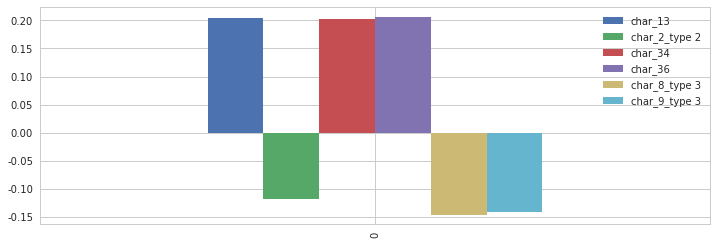

In [193]:
import numpy as np

# build a dictionary with the names of the components
components = {}
index = 0
for feature in dums.columns.values:
    components[feature] = [pca.components_[0][index]]
    index += 1
    
# Exclude all but the most extreme components, because there are a lot
sortedcomps = pca.components_[0]
sortedcomps.sort()
maxcap = sortedcomps[-3]
mincap = sortedcomps[2]
components = {i:x for i, x in components.items() if x >= maxcap or x <= mincap}
    
# Convert to dataframe
components = pd.DataFrame(components)

# Plot the most extreme components
components.plot(kind="bar", figsize=(12, 4))

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


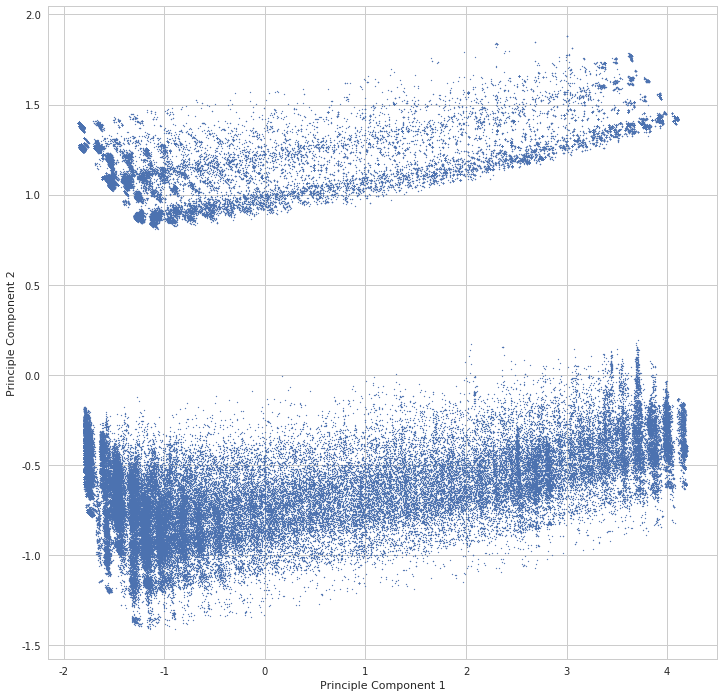

In [194]:
# Plot the first two principle components
featurecomponents = pd.DataFrame(featurecomponents, columns=["Principle Component 1", "Principle Component 2"])
df["Principle Component 1"] = featurecomponents["Principle Component 1"]

featurecomponents.plot(kind="scatter", x="Principle Component 1", y="Principle Component 2", figsize=(12, 12), s=1)

There are 1 data points in this group.


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


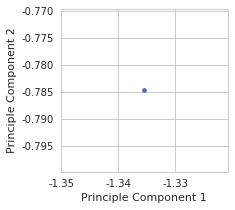

In [195]:
# Add group_1 to the new data from pca
featurecomponents["group_1"] = df["group_1"]

# Get a list of groups to sample from
groupslist = list(set(featurecomponents["group_1"].tolist()))

# Pick a group and plot
group = featurecomponents[featurecomponents["group_1"]==groupslist[0]]
group.plot(kind="scatter", x="Principle Component 1", y="Principle Component 2", figsize=(3, 3))
print("There are {} data points in this group.".format(len(group.index)))

There are 2 data points in this group.


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


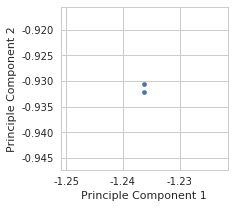

In [196]:
# Pick a group and plot
group = featurecomponents[featurecomponents["group_1"]==groupslist[5]]
group.plot(kind="scatter", x="Principle Component 1", y="Principle Component 2", figsize=(3, 3))
print("There are {} data points in this group.".format(len(group.index)))

There are 1 data points in this group.


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


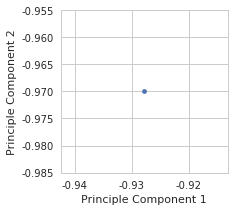

In [197]:
# Pick a group and plot
group = featurecomponents[featurecomponents["group_1"]==groupslist[6]]
group.plot(kind="scatter", x="Principle Component 1", y="Principle Component 2", figsize=(3, 3))
print("There are {} data points in this group.".format(len(group.index)))

In [198]:
# Define a list of possible amounts of explained variance we might care about
cares = [i/100 for i in range(75, 100, 5)]

# Run the PCA with increased components until each care level is reached
for i in range (20, len(dums.columns.values)):
    pca = PCA(n_components=i)
    pca.fit(scaledums)
    try:
        if pca.explained_variance_ratio_.sum() > cares[0]:

            # If greater, print a statement and drop the first item off the list
            print("To explain {0} of the variance you'll need {1} components".format(cares[0], i))
            cares = cares[1:]
    except:
        break

To explain 0.75 of the variance you'll need 21 components
To explain 0.8 of the variance you'll need 28 components
To explain 0.85 of the variance you'll need 38 components
To explain 0.9 of the variance you'll need 50 components
To explain 0.95 of the variance you'll need 66 components


In [200]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  3 17:08:06 2016

@author: Gareth
"""

# Based on https://www.kaggle.com/jeffd23/predicting-red-hat-business-value/single-unified-table-0-94-sklearn
# But rewritten for Python-practice
# Trains RandomForrestClassifier and ExtraTreesClassifier with default paramemters
# RFC: ~ 0.949
# Ext: ~ 0.947
# ExT + RFC: ~ 0.954 (magic!)

## Import functions
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


## Import data
actTrain = pd.read_csv('./data/act_train.csv')
actTest = pd.read_csv('./data/act_test.csv')
people = pd.read_csv('./data/people.csv')

IDTest = actTest['activity_id']
IDTrain = actTrain['activity_id']
IDPeople = actTrain['people_id']


## Def functions
def strSplit(string,splitChar,idx):
    # Split strings on character, return requested index
    string = string.split(splitChar)
    return string[idx]


def numericPeople(data):
    # Make people numeric
    data['people_id'] = data['people_id'].apply(strSplit, splitChar='_', idx=1)
    data['people_id'] = pd.to_numeric(data['people_id'])    
    return data


def ppActs(data):

    # Drop outcome and return in sperate vector
    if 'outcome' in data.columns:    
        outcome = data['outcome']
        data = data.drop('outcome', axis=1)
    else:
        outcome = 0
    # Drop activity ID
    data = data.drop(['date', 'activity_id'], axis=1)
        
    # Make people numeric
    data = numericPeople(data)
    
    # Convert rest to numeric
    for c in data.columns:
        data[c] = data[c].fillna('type 0')
        if type(data[c][1]) == str:        
           data[c] = data[c].apply(strSplit, splitChar=' ', idx=1)

    return data, outcome


def ppPeople(data):
    
    # Drop date    
    data = data.drop('date', axis=1)
    
    # Make people numeric
    data = numericPeople(data)      
    
    for c in data.columns:
        if type(data[c][1]) == np.bool_:
            data[c] = pd.to_numeric(data[c]).astype(int)
        elif type(data[c][1]) == str:
            data[c] = data[c].apply(strSplit, splitChar=' ', idx=1)
    
    return data
    

def skSplit(XTrain, YTrain, propTest, randState):
        # Split training-test set
    xtr, xte, ytr, yte = train_test_split(XTrain, YTrain, test_size = propTest,
                                      random_state = randState)

    return xtr, xte, ytr, yte
    
    
def fitSKRFC(XTrain, XTest, propTest, randState):
    # Fit and score RandomForestClassifier from SK Learn
    xtr, xte, ytr, yte = skSplit(XTrain, YTrain, propTest, randState)

    # Fitting
    fit = RandomForestClassifier()
    fit.fit(xtr, ytr)

    # Predict
    xtePred = fit.predict_proba(xte)
    auc = roc_auc_score(xtePred[:,1].round(), yte)
    print(auc)
    
    return fit


def predMod(fit, XTest):
    # Predict test set
    YTest = fit.predict_proba(XTest)
    yPred = YTest[:,1]
    
    return yPred


def writeSub(IDTest, yPred, fn):
    submission = pd.DataFrame({'activity_id': IDTest, 'outcome': yPred })
    submission.head()
    submission.to_csv(fn, index=False)
    
    print('Saved as', fn)
    
    
def fitSKExT(XTrain, YTrain, propTest, randState=123):  
    # Fit and score ExtraTreesClassifier from SK Learn
    # Split
    xtr, xte, ytr, yte = skSplit(XTrain, YTrain, propTest, randState)
    
    # Fit
    fit = ExtraTreesClassifier()
    fit.fit(xtr, ytr)
    # Score    
    xtePred = fit.predict_proba(xte)
    auc = roc_auc_score(xtePred[:,1].round(), yte)
    print(auc)
    
    return fit
    
    
## Preprocess 
XTrain, YTrain = ppActs(actTrain)
XTest, asd = ppActs(actTest)
proPeople = ppPeople(people)    

# Merge in people
XTrain = XTrain.merge(proPeople, how='left', on='people_id')
XTest = XTest.merge(proPeople, how='left', on='people_id')


## Do fitting
randState = 124
propTest = 0.25
# Fitting - RFC
fn = 'SubSKRFC.csv'
fitRFC = fitSKRFC(XTrain, XTest, propTest, randState)
yPredRFC = predMod(fitRFC, XTest)
# writeSub(IDTest, yPredRFC, fn)
    
# Fitting - extraTrees
fn = 'SubSKExT.csv'
fitExT = fitSKExT(XTrain, YTrain, propTest, randState)
yPredExT = predMod(fitExT, XTest)
# writeSub(IDTest, yPredExT, fn)

# Compare preidctions
sum(yPredExT.round() == yPredRFC.round()) / len(yPredExT)
bodged = (yPredExT+yPredRFC)/2
fn = 'bodgensamle.csv'

# Save
writeSub(IDTest, bodged, fn)

0.974348554122
0.97420194473
Saved as bodgensamle.csv
